# Lecture 9 - Filtering in Frequency Space

<br><br>

<b>There are many algorithms that rely on the ability to manipulate the frequencies of an image rather than the pixel intensities</b><br><br>

<b>In the previous lecture, the Fourier transform was reviewed and a few examples of the effect of manipulating frequencies was presented</b><br><br>

<b>We will extend that process by exploring frequency based filters</b><br><br>

<br><br><br><br>

## Frequency Filtering

<br>

<b>The Fourier transform organizes the information so that an element in the output array is the intensity of a particular frequency component</b><br><br>

<b>This allows for easy access to the individual frequencies, for which there are several powerful tools</b><br><br>

<b>Blocking out a selection of frequencies is an effective way to isolate desired information</b><br><br>

<b>For example, if the low frequencies are removed from an image then all that remains is the high frequencies which are associated with edge information</b><br><br>

<b>Thus such a filtering technique isolates the edges in an image</b><br><br>

<b>This is an example of a very simple filter named a high-pass filter since it passes the high frequencies</b><br><br>

<b>Low-pass filters, of course, pass the low frequencies and block the high frequencies</b><br><br>

<b>This removes the edge information</b><br><br>

<b>A band-pass filter has a minimum and maximum range of frequencies that are kept which is good for isolating objects in an image by size</b><br><br>

<b>A wedge filter targets the directions of the edges</b><br><br>

<b>All of these filters are shown here with examples and matching Python scripts</b>

<br><br><br><br>

### Low-pass Filter

<br>

<b>The low-pass filter will block the high frequencies and will allow all the low frequencies to pass through the filter</b><br><br>

<b>Since the low frequencies are collected near the center of the frame after a swap operation, the low-pass filter is easy to create</b><br><br>

<b>A mask is created that has a solid circular region centered in the frame</b><br><br>

<b>This mask is multiplied by the frequency array and only the frequencies within this circular region survive the multiplication</b><br><br>

<b>The high frequencies are blocked because they are multiplied by zero</b><br><br>

<b>Consider an image ${\bf a}[\vec x]$ and the operation

${\bf b}[\vec x] = \mathfrak{F}^{-1} \mathfrak{F} {\bf a}[\vec x]$

</b><br><br>
    
<b>The Fourier transform does not destroy information, and thus ${\bf b}[\vec x] = {\bf a}[\vec x]$</b><br><br>

<b>Now a mask is added to the system, but it is necessary to also swap the quadrants in the Fourier domain</b><br><br>

<b>So, the new operation is

${\bf b}[\vec x] = \mathfrak{F}^{-1} X \left( {\bf m}[\vec \omega] \times X \mathfrak{F} {\bf a}[\vec x] \right)$

where ${\bf m}[\vec \omega]$ is this mask</b><br><br>

<br><br>

<b>If all elements in ${\bf m}[\vec \omega]$ where 1 then ${\bf b}[\vec x] = {\bf a}[\vec x]$ would still be true</b><br><br>

<b>However, in this case the mask consists of a circular region of pixels with the value of 1 and a background with the values of 0</b><br><br>

<b>So, ${\bf b}[\vec x]$ is now a modified version of ${\bf a}[\vec x]$</b><br><br>

<b>In this case, the mask passes the low frequencies and blocks the high frequencies</b><br><br>

<b>Low frequencies are associated with larger solid regions while high frequencies are associated with edges</b><br><br>

<b>Thus, the result should be a blurry version of ${\bf a}[\vec x]$</b><br><br>

<b>As an example, the input image, ${\bf a}[\vec x]$, is the USAF resolution chart</b><br><br>

<b>The original image has black pixels on a white background and this will be reversed before processing</b><br><br>

<b>The low-pass filter is ${\bf m}[\vec \omega] = {\bf o}_{\vec w, \vec w/2, r}[\vec x]$ where $\vec w$ is the size of the frame and $r$ is a radius defined by the user</b><br><br>

<b>The process is,

${\bf b}[\vec x] = \mathfrak{R} \mathfrak{F}^{-1} X \left( {\bf m}[\vec \omega] \times X \mathfrak{F} \left( 1 - {\bf a}[\vec x]/256 \right)  \right)$

where the $1 - {\bf a}[\vec x]/256$ term scales the input and then reverses the intensity so that the background is black</b><br><br>

<b>The $\mathfrak{R}$ operator retrieves the real components of the complex numbers</b><br><br>

<b>USAF resolution chart</b>

<br><br>
<div><img src="https://github.com/joefoxva1/CDS468/blob/master/Lectures10_11_12/USAF1951w.jpg?raw=true" width="300"/img></div>
<br><br>


<br><br><br><br>

## FFTSHIFT

<br>

<b>What is the numpy function fftshift?</b><br><br>

<b>Shift the zero-frequency component to the center of the spectrum</b><br><br>

<b>The function swaps half-spaces for all axes listed (defaults to all)</b><br><br>

<br><br>

In [2]:
#  fftshift vector example
import numpy as np
import scipy.fftpack as ft

freqs = np.fft.fftfreq(10, 0.1)
print('\nFrequencies created:', freqs)

shiftFreqs = np.fft.fftshift(freqs)
print('\nShifted Frequencies:', shiftFreqs)


Frequencies created: [ 0.  1.  2.  3.  4. -5. -4. -3. -2. -1.]

Shifted Frequencies: [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]


In [3]:
#  fftshift matrix example

freqs = np.fft.fftfreq(9, d=1./9).reshape(3, 3)
print('\nFrequency Matrix created:\n', freqs)

shiftFreqs = np.fft.fftshift(freqs)
print('\nShifted Frequencies:\n', shiftFreqs)



Frequency Matrix created:
 [[ 0.  1.  2.]
 [ 3.  4. -4.]
 [-3. -2. -1.]]

Shifted Frequencies:
 [[-1. -3. -2.]
 [ 2.  0.  1.]
 [-4.  3.  4.]]


In [4]:
#  low pass filter
def Circle(size, loc, rad):
    """frame, center, radius size is (v,h) of size of array loc is (v,h) of circle location
    rad is integer of radius returns array with a solid circle"""
    b1, b2 = np.indices(size)
    b1, b2 = b1-loc[0], b2-loc[1]
    mask = b1 * b1 + b2 * b2
    mask = (mask <= rad * rad).astype(int)
    return mask

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio
import scipy.fftpack as ft

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures10_11_12/USAF1951w.jpg'
amg = imageio.imread(url, as_gray=True)

print('\nShape of Tests Image', amg.shape)
plt.title('Original Image')
plt.imshow(amg, cmap='gray')
plt.show()

bmg = 1 - amg/amg.max()                   #  reverses the bright and dark pixels
cmg = ft.fftshift(ft.fft2(bmg))           #  compute Fourier Transform

V, H = cmg.shape                          #  obtain the image shape
circ = Circle((V,H), (V/2,H/2), 10)       #  create the mask
plt.title('Circle Image')
plt.imshow(-circ, cmap='gray')
plt.show()

dmg = ft.ifft2(ft.fftshift(circ * cmg))   #  compute the inverse FFT of the mask multiplied by the previous FFT

plt.title('Low Pass Filter Image')
plt.imshow(dmg.real, cmap='gray')
plt.show()


<ipython-input-4-ea9493b6e8ee>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  amg = imageio.imread(url, as_gray=True)


TypeError: The keyword `as_gray` is no longer supported.Use `mode='F'` for a backward-compatible result, or  `mode='L'` for an integer-valued result.

<br><br><br><br>

### High-pass Filter

<br>

<b>The high-pass filter is just the opposite of a low pass filter, as the masks are the complements of the other</b><br><br>

<b>The high-pass filter allows the high frequencies to survive and blocks the low frequencies</b><br><br>

<b>So the mask is defined as

${\bf m}[\vec \omega] = 1 - {\bf o}_{\vec w, \vec w/2, r}[\vec x]$

</b><br><br>
    
<b>In this next example, $r=150$ is used to pass only the highest frequencies</b><br><br>

<br><br>

In [ ]:
#  high pass filter
plt.title('Original Image')
plt.imshow(amg, cmap='gray')
plt.show()

circ = 1 - Circle((V,H), (V/2,H/2), 150)
plt.title('High Pass Filter Image')
plt.imshow(circ, cmap='gray')
plt.show()

dmg = ft.ifft2(ft.fftshift(circ * cmg))

plt.title('High Pass Filter Image')
plt.imshow(-abs(dmg), cmap='gray')
plt.show()


<br><br><br><br>

### Band-pass Filter

<br>

<b>A band-pass filter is an annular ring instead of a solid circle, and it is created by ${\bf m}[\vec \omega] = {\bf o}_{\vec w, \vec w/2, r_2}[\vec x] - {\bf o}_{\vec w, \vec w/2, r_1}[\vec x]$ where $r_2 > r_1$ are the two radii that define the size of the annular ring </b><br><br>

<b>This example uses $r_1 = 48$ and $r_2 = 64$. The output displays solid filled blocks for a limited size range as seen on the right side of the image</b><br><br>

<b>Changing the values of $r_1$ and $r_2$ will change the range of sizes that survive the filtering process</b><br><br>

<br><br>

In [ ]:
url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures10_11_12/USAF1951w.jpg'
amg = imageio.imread(url, as_gray=True)

#  band pass filter
plt.title('Original Image')
plt.imshow(amg, cmap='gray')
plt.show()

#  create the annular ring
circ1 = Circle((V,H), (V/2,H/2), 48) #r1
circ2 = Circle((V,H), (V/2,H/2), 64) #r2
circ = circ2 - circ1

plt.title('Annular Ring')
plt.imshow(circ, cmap='gray')
plt.show()

cmg = ft.fftshift(ft.fft2(amg))           #  compute Fourier Transform
dmg = ft.ifft2(ft.fftshift(circ*cmg))

plt.title('Band Pass Filter Image')
plt.imshow(-abs(dmg), cmap='gray')
plt.show()

<br><br><br><br>

<b>The final example considers that the mask itself has sharp edges which can produce undesired ringing effects in the filtered image. The easy solution is to smooth the mask before it is applied to the frequencies as in</b><br><br>

${\bf b}[\vec x] = \left\lvert \mathfrak{F}^{-1} X \left( (\mathcal{S}_{10}{\bf m}[\vec \omega]) \times X \mathfrak{F} \left( 1 - {\bf a}[\vec x]/256 \right)  \right) \right \rvert$

<b>This will soften the edges in the Fourier space and reduce the negative effects</b><br><br>

<br><br>

In [ ]:
#  smooth edges
import scipy.ndimage as nd

plt.title('Original Image')
plt.imshow(amg, cmap='gray')
plt.show()

circ1 = Circle((V,H), (V/2,H/2), 36)
circ2 = Circle((V,H), (V/2,H/2), 72)
circ = circ2 - circ1
plt.title('Annular Ring')
plt.imshow(circ, cmap='gray')
plt.show()

ddmg = ft.ifft2(ft.fftshift(circ*cmg))
plt.title('Before Band Pass Filter with Smooth Edges Image')
plt.imshow(-abs(ddmg), cmap='gray')
plt.show()

circ = nd.gaussian_filter(circ+0.0, 10)
plt.title('Gaussian Filter of Annular Ring')
plt.imshow(circ, cmap='gray')
plt.show()

dmg = ft.ifft2(ft.fftshift(circ*cmg))

plt.title('Band Pass Filter with Smooth Edges Image')
plt.imshow(-abs(dmg), cmap='gray')
plt.show()

<br><br><br><br>

## Directional Filtering

<br>

<b>A wedge filter is so named because the filter is a set of opposing wedges centered in the frame</b><br><br>

<b>Inside of the wedges are pixels with a value of 1 and when multiplied by a Fourier transform this filter passes frequencies associated with orientation</b><br><br>

<b>The below shows the negative of a wedge filter (where the black pixels have a value of 1 and the white pixels have a value of 0)</b><br><br>

<b>The $0^\circ$ line points eastwards much like a graph and positive angles increase in the counter-clockwise direction</b><br><br>

<b>The creation of this image is

${\bf m}[\vec \omega] = {\bf w}_{\vec w; \theta_1, \theta_2}$

where $\vec w$ is the frame size and $\theta_1$ and $\theta_2$ are the two angles</b><br><br>

<b>This example uses $\theta_1 = 30^\circ$ and $\theta_2 = 40^\circ$</b><br><br>

<br><br>
<div><img src="https://github.com/joefoxva1/CDS468/blob/master/Lectures10_11_12/L11_2.png?raw=true" width="300"/img></div>
<br><br>

<b>The Wedge function creates the wedge image</b><br><br>

<b>The inputs are the frame size and the two angles in degrees</b><br><br>

<b>This function starts with the indices function which creates two matrices of which one increments its values by rows and the others increments its values by columns</b><br><br>

<b>These are centered to create a coordinate system</b><br><br>

<b>The next several lines of the code fills in the two triangles</b><br><br>

<b>The function ensures that the center point is 0</b><br><br>

<b>A serious problem occurs when using these in Fourier space as some filters will pass the DC term and others will not</b><br><br>

<b>Since wedge filtering is used just for orientation the preference is that the DC term not be passed</b><br><br>

<br><br>

<b>Consider the image ${\bf a}[\vec x]$ below</b><br><br>
    
<b>The goal is to isolate one set of lines The process is,

${\bf b}[\vec x] = \mathfrak{F}^{-1} X  \left( {\bf m}[\vec \omega] \times X \mathfrak{F} ( {\bf a}[\vec x] < 100 ) \right)$</b><br><br>

<b>The ${\bf m}[\vec \omega]$ is created with $\theta_1 = 30^\circ$ and $\theta_2 = 40^\circ$</b><br><br>

<b>In the original image, the target (the lines) is darker than the background</b><br><br>

<b>So, ${\bf a}[\vec x] < 100$ is used to set the target pixels to 1 and the background to 0</b><br><br>

<b>The second picture shows the negative of ${\bf b}[\vec x]$ which has the lines that are perpendicular to the direction of the wedge filter

</b><br><br>
<div><img src="https://github.com/joefoxva1/CDS468/blob/master/Lectures10_11_12/L11_3.png?raw=true" width="250"/img></div>
<br><br>


<ipython-input-5-f43f723615f1>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  adata = imageio.imread(url, mode='F').astype(np.uint8)


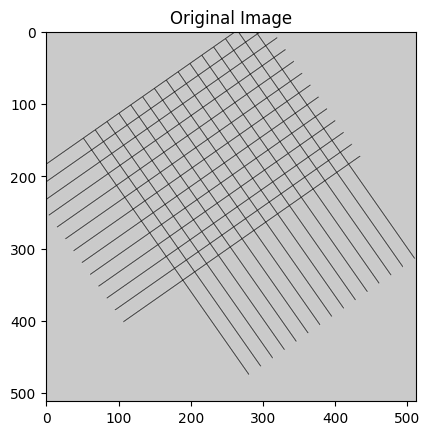

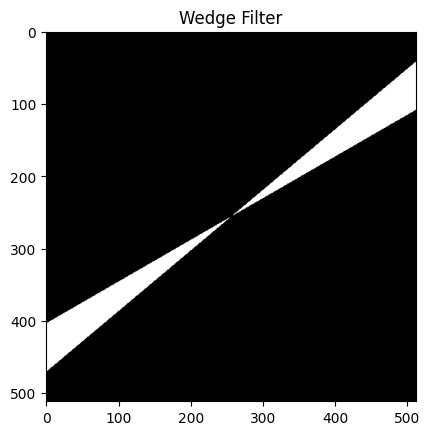

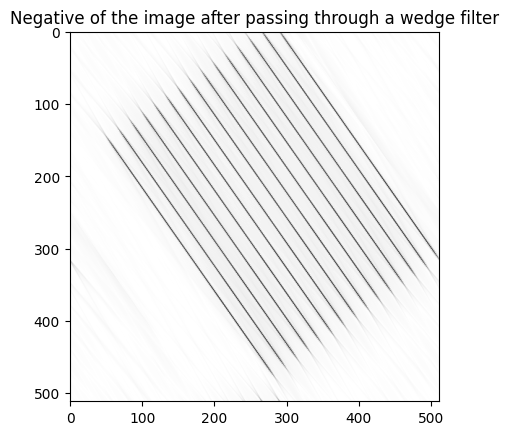

In [5]:
def Wedge(vh, t1, t2):
    ans = np.zeros(vh)
    ndx = np.indices(vh).astype(float)
    ndx[0] = ndx[0] - vh[0]/2
    ndx[1] = ndx[1] - vh[1]/2
    mask = ndx[0] == 0
    ndx[0] = (1-mask)*ndx[0] + mask*1e-10
    ans =  np.arctan(  ndx[1]  / ndx[0]  )
    ans = ans + np.pi/2
    mask = ans >= t1/180.* np.pi
    mask2 = ans < t2/180.* np.pi
    mask = np.logical_and( mask, mask2).astype(int)
    V,H = vh
    mask[V//2, H//2] = 0
    return mask

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures10_11_12/lines.png'
adata = imageio.imread(url, mode='F').astype(np.uint8)

plt.title('Original Image')
plt.imshow(adata, cmap='gray')
plt.show()

ddata = ft.fftshift(ft.fft2(adata))
V,H = adata.shape

mdata = Wedge((V,H), 30, 40)
plt.title('Wedge Filter')
plt.imshow(mdata, cmap='gray')
plt.show()

bdata = ft.ifft2(ft.fftshift (ddata * mdata))

plt.title('Negative of the image after passing through a wedge filter')
plt.imshow(-abs(bdata), cmap='gray')
plt.show()

<br><br><br><br>

## Fingerprint Example

<br>

<b>Fingerprint images are interesting in that they consist of lines and flow rather than large contiguous objects</b><br><br>

<b>Algorithms that sort the prints into groups rely heavily on the analysis of these flow patterns</b><br><br>

<b>This section will use Fourier transforms to detect the flow patterns as an educational device to explore the nature of Fourier transforms</b><br><br>

<b>There is no claim here that this is the best method of analyzing fingerprints</b><br><br>

<b>The proposed system uses wedge filters to detect ridge direction</b><br><br>

<b>For a single filter process was described as

$ {\bf b}[\vec x] = \mathfrak{F}^{-1} X  \left( {\bf m}[\vec \omega] \times X \mathfrak{F}  {\bf a}[\vec x]  \right)$

</b><br><br>

<b>The left picture shows a typical input and the right picture shows the result after applying the wedge filer</b><br><br>

<b>Clearly, the flow perpendicular to the wedges are enhanced in this image</b><br><br>

<br><br>
<div><img src="https://github.com/joefoxva1/CDS468/blob/master/Lectures10_11_12/L11_4.png?raw=true" width="250"/img></div>
<br><br>

<b>The goal is to detect flow in all directions, and so this application will required the use of several wedge filters of differing orientations</b><br><br>

<b>This set of filters is denoted by $\left\{ {\bf m}[\vec \omega] \right\}$ and the $i$-th filter is ${\bf m}_i [\vec x]$ </b><br><br>

<b>The protocol is then,

${\bf b}_i[\vec x] = \mathfrak{F}^{-1} X  \left( {\bf m}_i[\vec \omega] \times X \mathfrak{F} ( {\bf a}[\vec x] ) \right), ~~~ \forall i$

</b><br><br>

<br><br>

In [ ]:
def MaskinF(indata, fmask):
    fdata = ft.fftshift(ft.fft2(indata))
    fdata *= fmask
    answ = ft.ifft2(ft.fftshift(fdata))
    return answ

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures10_11_12/fing.png'
adata = imageio.imread(url, as_gray=True).astype(np.uint8)

plt.title('Original Image')
plt.imshow(adata, cmap='gray')
plt.show()

bdata = Wedge(adata.shape, 30, 45)
plt.title('Wedge Filter')
plt.imshow(bdata, cmap='gray')
plt.show()

cdata = MaskinF(adata, bdata)

plt.title('Negative of the result after the application of the wedge filter')
plt.imshow(cdata.real, cmap='gray')
plt.show()


<br><br><br><br>

<b>The process can be repeated several times with different wedge filters to extract ridges flowing in different directions</b><br><br>

<b>Each filter has a narrow range of angles and produces a filtered image</b><br><br>

<b>The next task is to display the data, which is cumbersome as there are several images in $\left\{ {\bf b}[\vec x] \right\}$</b><br><br>

<b>One option is to create a color coded image which can be created in a variety of ways</b><br><br>

The one chosen here considers the output images as a sequence with the index $i$</b><br><br>

<b>As $i$ increases the contribution to the red channel increases and the contribution to the blue channel decreases</b><br><br>

<b>This is performed in which is show in the code. The process is defined as,

$\mathbf{c}[\vec{x}]=\sum_{i}\left\{\begin{array}{c}256 / N \\ 0 \\ 256-256 / N\end{array}\right\} \mathbf{b}_{i}[\vec{x}]$

where $N$ is the number of images in $\left\{ {\bf b}[\vec x] \right\}$

</b><br><br>

<b>The result is shown below. The blue and red colors are used to designate flow directions</b><br><br>

<b>There are just a few classes of fingerprints (whorl, left loop, right loop, and arch) and two of these have subcategories</b><br><br>

<b>The flow direction is unique to each class and thus can be used to determine which class the print is</b><br><br>

<br><br>
<div><img src="https://github.com/joefoxva1/CDS468/blob/master/Lectures10_11_12/L11_5.png?raw=true" width="250"/img></div>
<br><br>

<br><br><br><br><br>

## Artifact Removal

<br>

<b>The final filtering topic is to demonstrate how filtering can be used to remove undesirable artifacts</b><br><br>

<b>Consider the image shown below which shows a baseball game with a wire screen between the camera and the action</b><br><br>

<b>The goal is to remove the wire screen</b><br><br>

<br><br>
<div><img src="https://github.com/joefoxva1/CDS468/blob/master/Lectures10_11_12/baseball.jpg?raw=true" width="500"/img></div>
<br><br>

<b>The screen is a regular pattern and with nearly vertical and horizontal lines</b><br><br>

<b>Such a pattern will produced large signals along the vertical and horizontal axes of the Fourier transform</b><br><br>

<b>The original color image is ${\bf a}[\vec x]$ and it is converted to gray scale and normalized before the conversion to Fourier space</b><br><br>

<br><br>

<b>The process is,

${\bf b}[\vec \omega] = X \mathfrak{F} \frac{\mathcal{L}_L U_{2 \vec w} {\bf a}[\vec x]} {\bigvee {\bf a}[\vec x]}$

where the $\mathcal{L}$ function performs the conversion to gray scale and the $U_{2 \vec w}$ function places the original image into the middle of a frame that is twice the size as the original image</b><br><br>

<b>This latter step is padding which eliminates some of the effects from the frame edges</b><br><br>

<b>The image $\log \left( \left \lvert {\bf b}[\vec x] \right \rvert + 1 \right)$ is shown above, but this is only the center portion of the image</b><br><br>

<b>There are periodic signals along the two axes that are from the frame edge and from the regular pattern of the screen</b><br><br>

<b>The mask, ${\bf m}[\vec \omega]$ should be designed to eliminate the frequencies of the screen without damaging the image</b><br><br>

<b>The proper method to do this is to create an image which is nothing but the screen (with the screen pixels set to 1) and then study the pattern in Fourier space</b><br><br>

<b>Then the precise frequencies can be identified and the eliminated</b><br><br>

<br><br>

<b>The example shown here is simpler which means that the results could be improved</b><br><br>

<b>The mask that is constructed for this task is an image with all of the pixels set to 1 except for four rectangles that remove the periodic signals</b><br><br>

<b>This will block the frequencies associated with the screen without too much damage to the image</b><br><br>

<b>Once the mask is constructed the rest of the process follows the protocol that has been explored in previous examples</b><br><br>

<b>The final result is,

${\bf c}[\vec x] = \Box \mathfrak{R} \mathfrak{F}^{-1} X \left( \left( \mathcal{S}_{10} {\bf m}[\vec \omega] \right) \times {\bf b}[\vec \omega] \right)$
</b><br><br>

<br><br>

In [ ]:
#  example
def Plop(data, VH, back=0):
    # vmax, hmax are size of frame
    ans = np.zeros(VH, float) + back
    vmax, hmax = VH

    # plops the data in the center, get center of blob
    V,H = data.shape
    vctr, hctr = V//2, H//2
    vactr, hactr = vmax//2, hmax//2

    # compute the limits for the answ
    valo = vactr - vctr
    if valo<0: valo = 0
    vahi = vactr + vctr
    if vahi>=vmax: vahi = vmax
    halo = hactr - hctr
    if halo<0: halo = 0
    hahi = hactr + hctr
    if hahi>=hmax: hahi = hmax

    # compute limits of incoming
    vblo = vctr - vactr
    if vblo<=0: vblo = 0
    vbhi = vctr + vactr
    if vbhi>=V: vbhi= V
    hblo = hctr - hactr
    if hblo<=0: hblo = 0
    hbhi = hctr + hactr
    if hbhi>=H: hbhi = H
    #print vctr,hctr
    #print valo,vahi, halo,hahi,vblo,vbhi, hblo,hbhi
    if vahi-valo != vbhi-vblo:
        vbhi = vblo+vahi-valo
    if hahi-halo != hbhi-hblo:
        hbhi = hblo+hahi-halo
    ans[valo:vahi, halo:hahi] = data[vblo:vbhi, hblo:hbhi] + 0
    return ans

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures10_11_12/baseball.jpg'
adata = imageio.imread(url, as_gray=True).astype(np.uint8)

print('\nShape of our image', adata.shape)
plt.title('Original Image')
plt.imshow(adata, cmap='gray')
plt.show()

V,H = adata.shape
temp = Plop(adata, (2*V,2*H))
plt.title('Plop Image')
plt.imshow(temp, cmap='gray')
plt.show()

bdata = ft.fftshift(ft.fft2 (temp/adata.max()))  #  FFT Shift Image

mdata = np.ones((2*V,2*H))
mdata[V-50:V+50,:666] = 0
mdata[V-50:V+50,-666:] = 0
mdata[:450,H-50:H+50] = 0
mdata[-450:,H-50:H+50] = 0
mdata = nd.gaussian_filter(mdata, 10)
plt.title('Gaussian Filter Image')
plt.imshow(mdata, cmap='gray')
plt.show()

temp = ft.ifft2(ft.fftshift(mdata * bdata))
plt.title('Removal of the screen from the baseball image')
plt.imshow(temp.real, cmap='gray')
plt.show()

cdata = temp.real[V-V//2:V+V//2,H-H//2:H+H//2]

plt.title('Removal of the screen from the baseball image')
plt.imshow(cdata, cmap='gray')
plt.show()


<br><br><br><br>

## Summary

<b>Filtering frequencies is a very powerful technique of which there are many applications</b><br><br>

<b>The common approach is to apply a Fourier transform to the image, modify the frequencies, and the use the inverse Fourier transform to convert the image back to its original space</b><br><br>

<b>Then it is possible to see the changes from the filtering</b><br><br>

<b>This chapter explored a few common frequency filtering techniques. The next chapter will extend this idea into the creation of tailored filters</b>

<br><br><br><br>

##  Homework 9

<br><br>

1.  Apply a low-pass filter to the USAF1951w.jpg image using a circular mask of 50 pixels in radius centered on the window.  What differences are created as compared to the 10 pixel radius used in class?<br><br>

2.  Use a bandpass filter on the USAF1951w.jpg image with r1 = 32 and r2 = 64 centered on the window.  Describe your results.<br><br>

3. Use the Smooth Edge code with an inner circle of 32 pixels and the outer circle of 64 pixels to smooth the edges of the USAF1951w.jpg image with a maximum filter of size 10 and then a minimun filter of size 10 centered on the image.  Describe the differences.<br><br>

4.  Using the lines.png file, create a wedge filter to eliminate the other set of parallel lines (the ones moving from the top left to the bottom right).
